In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("GadgetIn.csv")
x2 = df.iloc[:,[6,7]].values
y = df.iloc[:,12].values

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y2 = le.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.25, random_state=1)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x2_train = sc.fit_transform(x2_train)
x2_test= sc.fit_transform(x2_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
cl = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
cl.fit(x2_train,y2_train)

KNeighborsClassifier()

In [ ]:
y_predik = cl.predict(x2_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test,y_predik)
cm

<ipython-input-16-747459800705>:5: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(x,x1, cl.predict(np.array([x.ravel(),x1.ravel()]).T).reshape(x.shape),
<ipython-input-16-747459800705>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0],x_set[y_set == j,1],


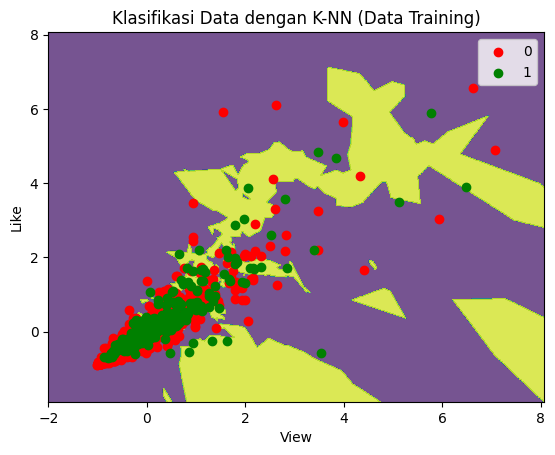

In [16]:
from matplotlib.colors import ListedColormap
x_set, y_set = x2_train, y2_train
x,x1 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step=0.01),
                   np.arange(start=x_set[:,1].min()-1,stop = x_set[:,0].max()+1, step=0.01))
plt.contourf(x,x1, cl.predict(np.array([x.ravel(),x1.ravel()]).T).reshape(x.shape),
             alpha = 0.75,camp=ListedColormap(('red','green')))
plt.xlim(x.min(),x.max())
plt.ylim(x1.min(),x1.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set == j,1],
              c = ListedColormap(('red','green'))(i),label=j)
plt.title('Klasifikasi Data dengan K-NN (Data Training)')
plt.xlabel('View')
plt.ylabel('Like')
plt.legend()
plt.show()

<ipython-input-20-21624725486f>:5: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(x,x1, cl.predict(np.array([x.ravel(),x1.ravel()]).T).reshape(x.shape),
<ipython-input-20-21624725486f>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0],x_set[y_set == j,1],


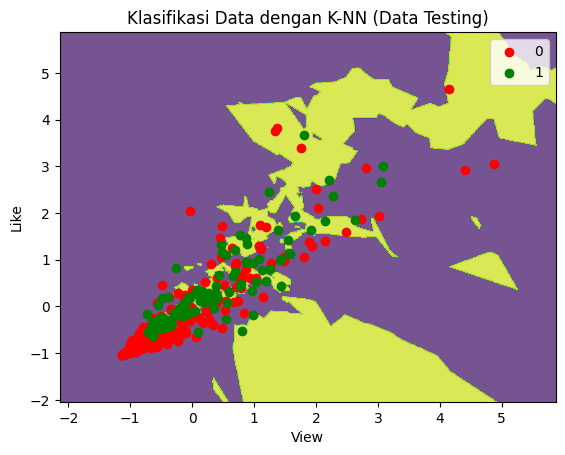

In [20]:
from matplotlib.colors import ListedColormap
x_set, y_set = x2_test, y2_test
x,x1 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step=0.01),
                   np.arange(start=x_set[:,1].min()-1,stop = x_set[:,0].max()+1, step=0.01))
plt.contourf(x,x1, cl.predict(np.array([x.ravel(),x1.ravel()]).T).reshape(x.shape),
             alpha = 0.75,camp=ListedColormap(('red','green')))
plt.xlim(x.min(),x.max())
plt.ylim(x1.min(),x1.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set == j,1],
              c = ListedColormap(('red','green'))(i),label=j)
plt.title('Klasifikasi Data dengan K-NN (Data Testing)')
plt.xlabel('View')
plt.ylabel('Like')
plt.legend()
plt.show()